<a href="https://colab.research.google.com/github/RoyElkabetz/Tensor-Networks-Simple-Update/blob/main/Quantum_Ising_Model_Phase_Transition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# If running from google colab change to TRUE
run_from_colab = False  # True if using google colab

### Cloning the latest tnsu repo from github
You can clone the latest `tnsu` repo from github or run 
```
!pip install tnsu
```

In [2]:
import sys
import os

if run_from_colab:
    # clone the git reposetory
    !git clone https://github.com/RoyElkabetz/Tensor-Networks-Simple-Update

    # add path to .py files for import
    sys.path.insert(1, "/content/Tensor-Networks-Simple-Update/src")

    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    
    # path for saving the networks
    save_path = '/content/gdrive/MyDrive/tmp'
else:
    # clone the git reposetory
    !git clone https://github.com/RoyElkabetz/Tensor-Networks-Simple-Update
    
    # add path to .py files for import
    sys.path.insert(1, "Tensor-Networks-Simple-Update/src")
    
    # path for saving the networks
    save_path = '../tmp/networks'
    
if not os.path.exists(save_path):
    os.makedirs(save_path)

fatal: destination path 'Tensor-Networks-Simple-Update' already exists and is not an empty directory.


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tnsu.tensor_network import TensorNetwork
import tnsu.simple_update as su


np.random.seed(216)

plt.rcParams.update({'font.size': 16, 
                     "figure.facecolor": 'white', 
                     "axes.facecolor": 'white', 
                     "savefig.facecolor": 'white', 
                     'savefig.edgecolor' : 'white', 
                     'figure.edgecolor' : 'white'})

# Simulating the Quantum Phase Transition of an Ising Transverse Field (ITF) Hamiltonian on an infinite $2D$ Lattice

The ITF Hamiltonian is given by

\begin{align}
    H = -J\sum_{<i, j>}\sigma_i^z \cdot \sigma_j^z - h\sum_{i}\sigma_i^x
\end{align}

In [10]:
# The Tensor Network structure matrix
ising_structure_matrix = np.array([[1, 2, 3, 4, 0, 0, 0, 0],
                                   [1, 2, 0, 0, 3, 4, 0, 0],
                                   [0, 0, 1, 2, 0, 0, 3, 4,],
                                   [0, 0, 0, 0, 1, 2, 3, 4]])
# Simple-Update parameters
d_max_ising = [2]
error = 1e-6
max_iterations = 200
ising_energy = []
ising_z_magnetizaton = []
ising_x_magnetizaton = []

j_ij_ising = [-1.] * 8
dts = [0.1, 0.01, 0.001, 0.0001, 0.00001]
h_k = -np.linspace(0, 4, 60)

# Pauli matrices
pauli_x = np.array([[0, 1],
                    [1, 0]])
pauli_y = np.array([[0, -1j],
                    [1j, 0]])
pauli_z = np.array([[1, 0],
                    [0, -1]])

s_i = [pauli_z]
s_j = [pauli_z]
s_k = [pauli_x]


# Run
for d_max in d_max_ising:
    for h in h_k:
        ising = TensorNetwork(structure_matrix=ising_structure_matrix, 
                              virtual_dim=d_max)
        ising_su = su.SimpleUpdate(tensor_network=ising, 
                                  dts=dts, 
                                  j_ij=j_ij_ising, 
                                  h_k=h, 
                                  s_i=s_i, 
                                  s_j=s_j, 
                                  s_k=s_k, 
                                  d_max=d_max, 
                                  max_iterations=max_iterations, 
                                  convergence_error=error, 
                                  log_energy=False,
                                  print_process=False)
        ising_su.run()
        energy = ising_su.energy_per_site()
        z_magnetization = ising_su.expectation_per_site(pauli_z)
        x_magnetization = ising_su.expectation_per_site(pauli_x)
        print('| D max: {:3d} | h: {:3.10f} | Energy: {:3.10f} | Mz: {:3.10f} | Mx: {:3.10f} |'
        .format(d_max, h, energy, z_magnetization, x_magnetization))
        ising_energy.append(energy)
        ising_z_magnetizaton.append(z_magnetization)
        ising_x_magnetizaton.append(x_magnetization)

Exception ignored in: <function tqdm.__del__ at 0x7f7df822b5e0>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tqdm/std.py", line 1145, in __del__
    self.close()
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tqdm/notebook.py", line 283, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm' object has no attribute 'disp'


==> Simple Update converged. final error is 0.0000000000 < 0.0000010000.
| D max:   2 | h: -0.0000000000 | Energy: -1.9999999997 | Mz: 0.9999999999 | Mx: 0.0000120168 |
==> Simple Update converged. final error is 0.0000000011 < 0.0000010000.
| D max:   2 | h: -0.0677966102 | Energy: -2.0005745609 | Mz: -0.9998562105 | Mx: 0.0169572669 |
==> Simple Update converged. final error is 0.0000000018 < 0.0000010000.
| D max:   2 | h: -0.1355932203 | Energy: -2.0022984096 | Mz: -0.9994249695 | Mx: 0.0339055010 |
==> Simple Update converged. final error is 0.0000000029 < 0.0000010000.
| D max:   2 | h: -0.2033898305 | Energy: -2.0051720406 | Mz: -0.9987049077 | Mx: 0.0508700458 |
==> Simple Update converged. final error is 0.0000000046 < 0.0000010000.
| D max:   2 | h: -0.2711864407 | Energy: -2.0091962803 | Mz: -0.9976943962 | Mx: 0.0678493320 |
==> Simple Update converged. final error is 0.0000000067 < 0.0000010000.
| D max:   2 | h: -0.3389830508 | Energy: -2.0143722883 | Mz: 0.9963909671 | M

==> Simple Update converged. final error is 0.0000000995 < 0.0000010000.
| D max:   2 | h: -3.3220338983 | Energy: -3.4773510383 | Mz: -0.0061220514 | Mx: 0.9499163307 |
==> Simple Update converged. final error is 0.0000000996 < 0.0000010000.
| D max:   2 | h: -3.3898305085 | Energy: -3.5418294421 | Mz: 0.0031098580 | Mx: 0.9521348522 |
==> Simple Update converged. final error is 0.0000000998 < 0.0000010000.
| D max:   2 | h: -3.4576271186 | Energy: -3.6064523146 | Mz: 0.0018442022 | Mx: 0.9541952569 |
==> Simple Update converged. final error is 0.0000001000 < 0.0000010000.
| D max:   2 | h: -3.5254237288 | Energy: -3.6712099285 | Mz: 0.0011625538 | Mx: 0.9561182326 |
==> Simple Update converged. final error is 0.0000001002 < 0.0000010000.
| D max:   2 | h: -3.5932203390 | Energy: -3.7360934829 | Mz: -0.0009802413 | Mx: 0.9579170474 |
==> Simple Update converged. final error is 0.0000001004 < 0.0000010000.
| D max:   2 | h: -3.6610169492 | Energy: -3.8010951146 | Mz: 0.0006927509 | Mx:

### Plot Results

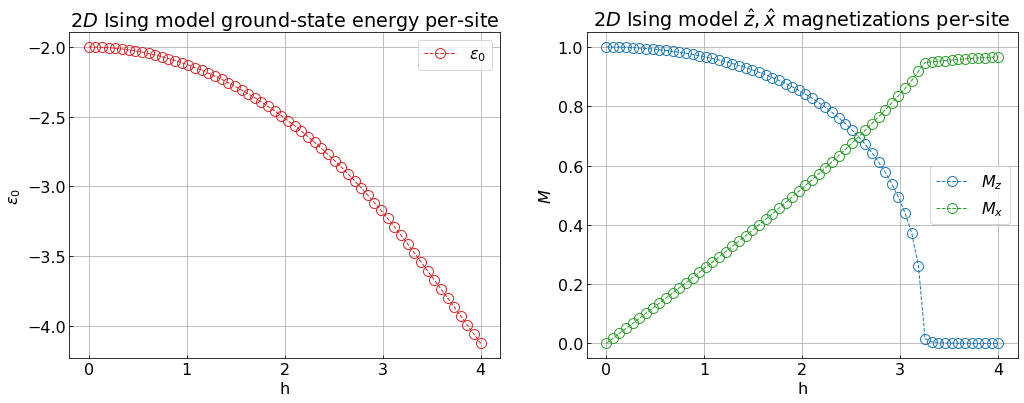

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(17, 6))
ax[0].plot(-h_k, ising_energy, '--o', label=r'$\epsilon_0$', color='tab:red', 
           markerfacecolor='none', linewidth=1, markersize=10)
ax[0].set_xlabel(r'h')
ax[0].set_ylabel(r'$\epsilon_0$')
ax[0].set_title('$2D$ Ising model ground-state energy per-site')
ax[0].tick_params(direction='in', axis='both')
ax[0].grid()
ax[0].legend()

ax[1].plot(-h_k, np.abs(np.array(ising_z_magnetizaton)), '--o', label=r'$M_z$', 
           color='tab:blue', markerfacecolor='none', linewidth=1, markersize=10)
ax[1].plot(-h_k, ising_x_magnetizaton, '--o', label=r'$M_x$', color='tab:green', 
           markerfacecolor='none', linewidth=1, markersize=10)
ax[1].set_xlabel(r'h')
ax[1].set_ylabel(r'$M$')
ax[1].set_title(r'$2D$ Ising model $\hat{z}, \hat{x}$ magnetizations per-site')
ax[1].tick_params(direction='in', axis='both')
ax[1].grid()
ax[1].legend()